<a href="https://colab.research.google.com/github/Drij0586/Volatility-prediction/blob/main/VixPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
import nsepy as nse
from datetime import date
import pandas as pd
import numpy as np

In [100]:
df = nse.get_history(symbol = 'VIX' , index = True , start = date(2020,1,1) , end = date(2022,11,1))

In [101]:
df

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2020-01-01,11.67,11.73,11.09,11.60,NaN,NaN
2020-01-02,11.60,11.70,10.73,11.49,NaN,NaN
2020-01-03,11.49,12.94,10.69,12.70,NaN,NaN
2020-01-06,12.70,15.10,12.70,14.78,NaN,NaN
2020-01-07,14.78,14.91,14.46,14.61,NaN,NaN
...,...,...,...,...,...,...
2022-10-25,17.42,17.62,16.49,16.88,NaN,NaN
2022-10-27,16.88,17.07,14.79,16.60,NaN,NaN
2022-10-28,16.60,17.04,15.85,15.92,NaN,NaN


In [102]:

df.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2020-01-01,11.67,11.73,11.09,11.60,NaN,NaN
2020-01-02,11.60,11.70,10.73,11.49,NaN,NaN
2020-01-03,11.49,12.94,10.69,12.70,NaN,NaN
2020-01-06,12.70,15.10,12.70,14.78,NaN,NaN
2020-01-07,14.78,14.91,14.46,14.61,NaN,NaN


In [103]:
df.drop(['Volume','Turnover'],axis = 1,inplace = True)

In [104]:
df.head()

,Open,High,Low,Close
Date,,,,
2020-01-01,11.67,11.73,11.09,11.60
2020-01-02,11.60,11.70,10.73,11.49
2020-01-03,11.49,12.94,10.69,12.70
2020-01-06,12.70,15.10,12.70,14.78
2020-01-07,14.78,14.91,14.46,14.61


In [105]:
cls = df['Open']

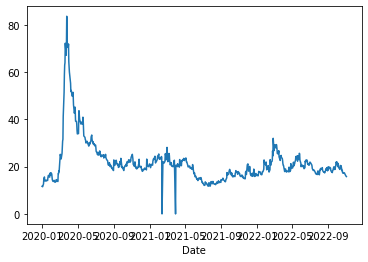

In [106]:

cls.plot()

In [107]:
cs = cls.values
cls

Date
2020-01-01    11.67
2020-01-02    11.60
2020-01-03    11.49
2020-01-06    12.70
2020-01-07    14.78
              ...  
2022-10-25    17.42
2022-10-27    16.88
2022-10-28    16.60
2022-10-31    15.92
2022-11-01    15.80
Name: Open, Length: 706, dtype: float64

In [108]:
import matplotlib.pyplot as plt

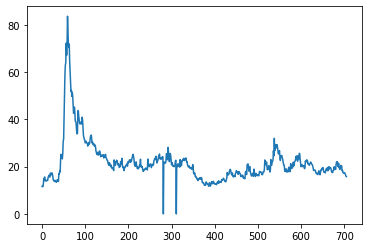

In [109]:

plt.plot(cs)

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
normalizer = MinMaxScaler(feature_range = (0,1))
scaled_cs = normalizer.fit_transform(np.array(cs).reshape(-1,1))

In [112]:
train_size = int(len(scaled_cs)*0.70)
test_size  =  len(scaled_cs) - train_size

In [113]:
strain , stest = scaled_cs[0:train_size,:] , scaled_cs[train_size:len(scaled_cs),:1]

In [114]:
def create_ds(dataset,step):
  Xtrain, Ytrain = [], []
  for i in range(len(dataset)-step-1):
    a = dataset[i:(i+step),0]
    Xtrain.append(a)
    Ytrain.append(dataset[i + step, 0])
  return np.array(Xtrain) , np.array(Ytrain)


In [115]:
stepsize = 50
X_train , Y_train = create_ds(strain , stepsize)
X_test , Y_test = create_ds(stest , stepsize)


In [116]:
X_train.shape , Y_train.shape

((443, 50), (443,))

In [117]:
X_test.shape , Y_test.shape

((161, 50), (161,))

In [118]:
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , 1)

In [119]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [120]:
model = Sequential()
model.add(LSTM(units=50 , return_sequences = True , input_shape = (X_train.shape[1],1)))
model.add(LSTM(units=50 , return_sequences = True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation ='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_10 (LSTM)              (None, 50, 50)            20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.compile(loss = 'mean_squared_error' , optimizer = 'adam')
model.fit(X_train , Y_train , validation_data = (X_test,Y_test) , epochs = 100 , batch_size = 64)

Epoch 1/100
7/7 [==============================] - 9s 536ms/step - loss: 0.0409 - val_loss: 0.0137
Epoch 2/100
7/7 [==============================] - 1s 207ms/step - loss: 0.0136 - val_loss: 0.0022
Epoch 3/100
7/7 [==============================] - 2s 227ms/step - loss: 0.0110 - val_loss: 0.0030
Epoch 4/100
7/7 [==============================] - 2s 221ms/step - loss: 0.0091 - val_loss: 7.4859e-04
Epoch 5/100
7/7 [==============================] - 2s 219ms/step - loss: 0.0085 - val_loss: 7.3594e-04
Epoch 6/100
7/7 [==============================] - 2s 234ms/step - loss: 0.0076 - val_loss: 0.0013
Epoch 7/100
7/7 [==============================] - 2s 236ms/step - loss: 0.0069 - val_loss: 5.9925e-04
Epoch 8/100
7/7 [==============================] - 2s 232ms/step - loss: 0.0066 - val_loss: 0.0011
Epoch 9/100
7/7 [==============================] - 2s 208ms/step - loss: 0.0062 - val_loss: 5.5689e-04
Epoch 10/100
7/7 [==============================] - 2s 228ms/step - loss: 0.0057 - val_loss: 

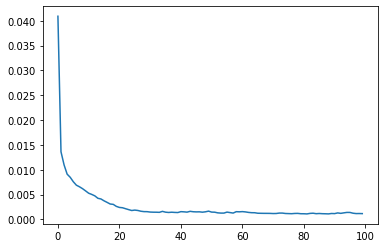

In [122]:
loss = model.history.history['loss']
plt.plot(loss)

In [123]:
train_predict = model.predict(X_train) 
test_predict = model.predict(X_test)

6/6 [==============================] - 0s 19ms/step


In [124]:
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

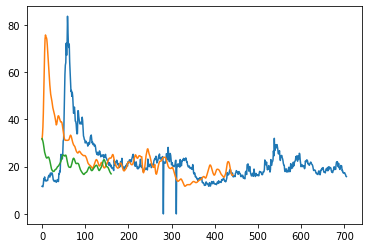

In [125]:
plt.plot(normalizer.inverse_transform(scaled_cs))
plt.plot(train_predict)
plt.plot(test_predict)

In [126]:
test = np.vstack((train_predict,test_predict))


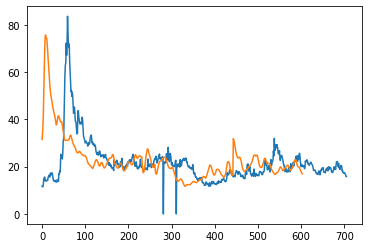

In [127]:
plt.plot(normalizer.inverse_transform(scaled_cs))
plt.plot(test)

In [128]:
len(stest)

212

In [129]:
futinp = stest[112:]
futinp = futinp.reshape(1,-1)
tmpinp = list(futinp)
futinp.shape

(1, 100)

In [130]:
tmpinp = tmpinp[0].tolist()

In [131]:
last_output = []
nsteps = 100
i = 0
while(i<10):
  if(len(tmpinp)>100):
    futinp = np.array(tmpinp[1:])
    futinp = futinp.reshape(1,-1)
    futinp = futinp.reshape((1,nsteps,1))
    yhat = model.predict(futinp , verbose=0)
    tmpinp.extend(yhat[0].tolist())
    tmpinp = tmpinp[1:]
    last_output.extend(yhat.tolist())
    i+=1
  else:
    futinp = futinp.reshape((1,nsteps,1))
    yhat = model.predict(futinp , verbose=0)
    tmpinp.extend(yhat[0].tolist())
    last_output.extend(yhat.tolist())
    i+=1

print(last_output)





[[0.19537527859210968], [0.1927104890346527], [0.1907845139503479], [0.18942274153232574], [0.18843577802181244], [0.18767838180065155], [0.1870582103729248], [0.1865251362323761], [0.18605631589889526], [0.18564404547214508]]


In [132]:
len(scaled_cs)

706

In [133]:
newplot = np.arange(1,101)
predplot = np.arange(101,111)

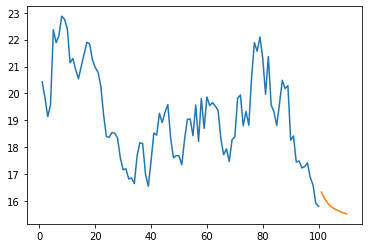

In [134]:
plt.plot(newplot,normalizer.inverse_transform(scaled_cs[606:]))
plt.plot(predplot,normalizer.inverse_transform(last_output))

In [135]:
 clnew = scaled_cs.tolist()
 


In [136]:
len(clnew)

706

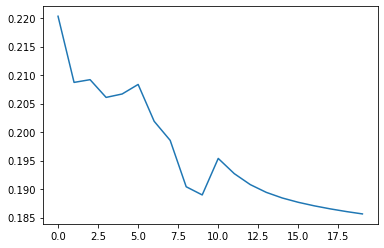

In [137]:
clnew.extend(last_output)
plt.plot(clnew[696:])

In [138]:
finalg = normalizer.inverse_transform(clnew).tolist()

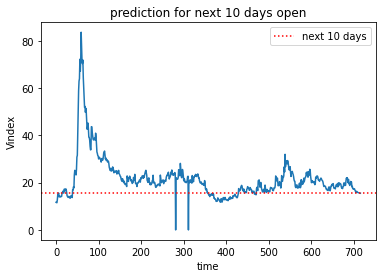

In [139]:
plt.plot(finalg)
plt.ylabel("Vindex")
plt.xlabel("time")
plt.title("prediction for next 10 days open".format('VIX'))
plt.axhline(y=finalg[len(finalg)-1],color = 'red' , linestyle = ":" , label = 'next 10 days'.format(round(float(*finalg[len(finalg)-1]),2)))
plt.legend()